In [1]:
import pandas as pd
import numpy as np
import textwrap
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Deepam
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Deepam
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import pathlib

root_dir = pathlib.Path(r"D:\Deepam\bbc")

data = []

for category_dir in root_dir.iterdir():
    if category_dir.is_dir():
        label = category_dir.name

        for file_path in category_dir.glob("*.txt"):
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()
                data.append({"text": text, "labels": label})

df = pd.DataFrame(data)

In [7]:
stops = set(stopwords.words('english'))

In [8]:
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year'
})

In [9]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [10]:
vectorizer = CountVectorizer(stop_words=list(stops))

In [11]:
X = vectorizer.fit_transform(df['text'])

In [12]:
# Note:- we could potentially split the data into train and test
# and evaluate the model using the log-likelihood or perplexity
# on out-of-sample data

In [13]:
nmf = NMF(
    n_components=10, # default: 10
    beta_loss='kullback-leibler',
    solver='mu',
    # alpha_W=0.1,
    # alpha_H=0.1,
    # 11_ratio=0.5,
    random_state=0,
)

In [14]:
nmf.fit(X)
# this is a matrices which is 'topics by words'

NMF(beta_loss='kullback-leibler', n_components=10, random_state=0, solver='mu')

In [18]:
def plot_top_words(model, features_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1: -1]
        top_features = [features_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={'fontsize':30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('NMF', fontsize=40)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show();

<Figure size 640x480 with 0 Axes>

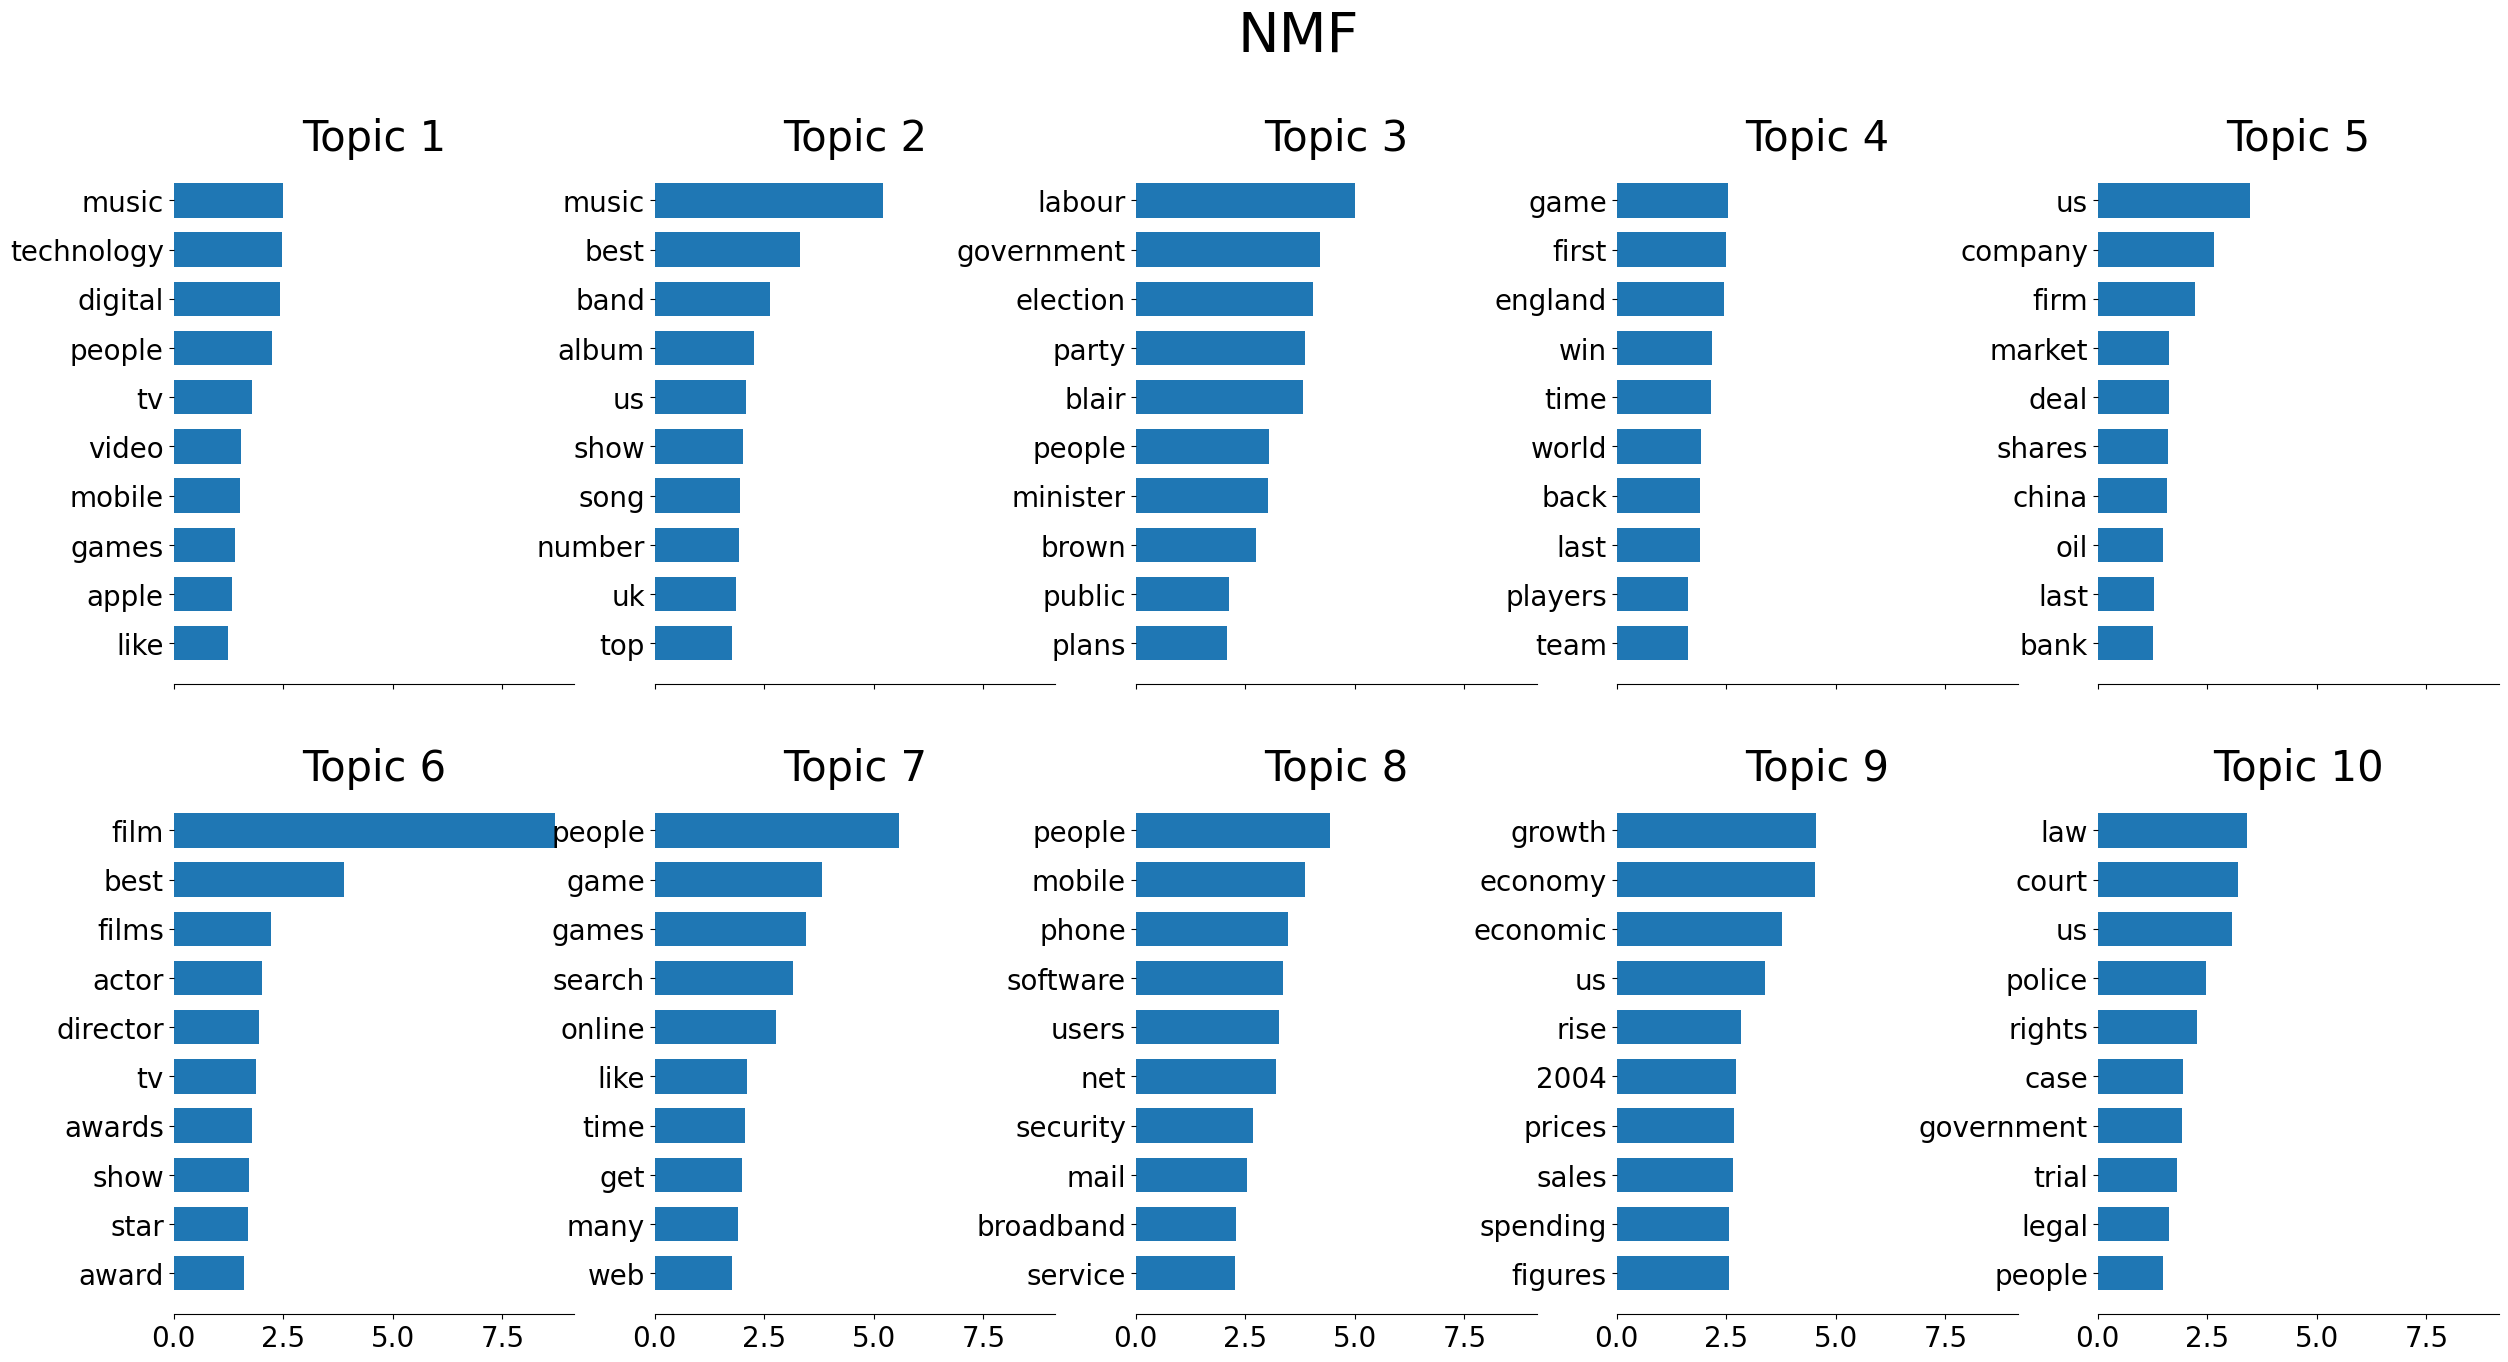

In [19]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, feature_names);

In [21]:
Z = nmf.transform(X) # this marix is document by topics, for clustering this could 
# represent cluster IDs and, for topic modelling this represents a distribution over topics

# LDA essentially gives two matrices :- 1) Document by topics 
# 2) topics by words

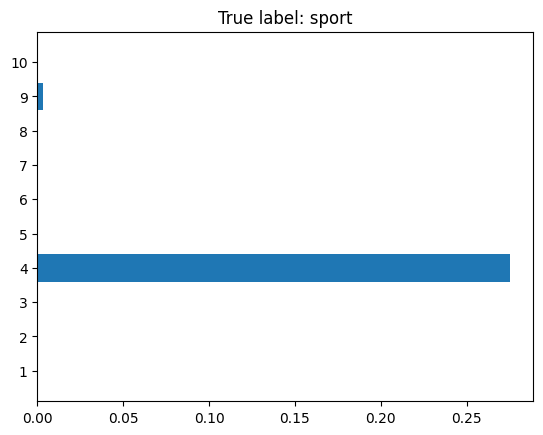

In [22]:
# Pick a random document
# Check which 'topics' are associated with it
# Are they related to the true label?

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title("True label: %s" %df.iloc[i]['labels']);

In [23]:
def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g